In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [115]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv')

## 1 - Exploration des données

### 1.1.1 Nombre de données, visualisation des colonnes du dataset et type de données

In [116]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [117]:
df.shape

(583, 11)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### 1.1.2 - Observation des valeurs NULL

In [119]:
df_copy = df.copy()

df_copy[df_copy.isna().any(axis = 1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


## 1.2 - Observation des variables du dataframe 

### 1.2.1 - Analyse de la distribution

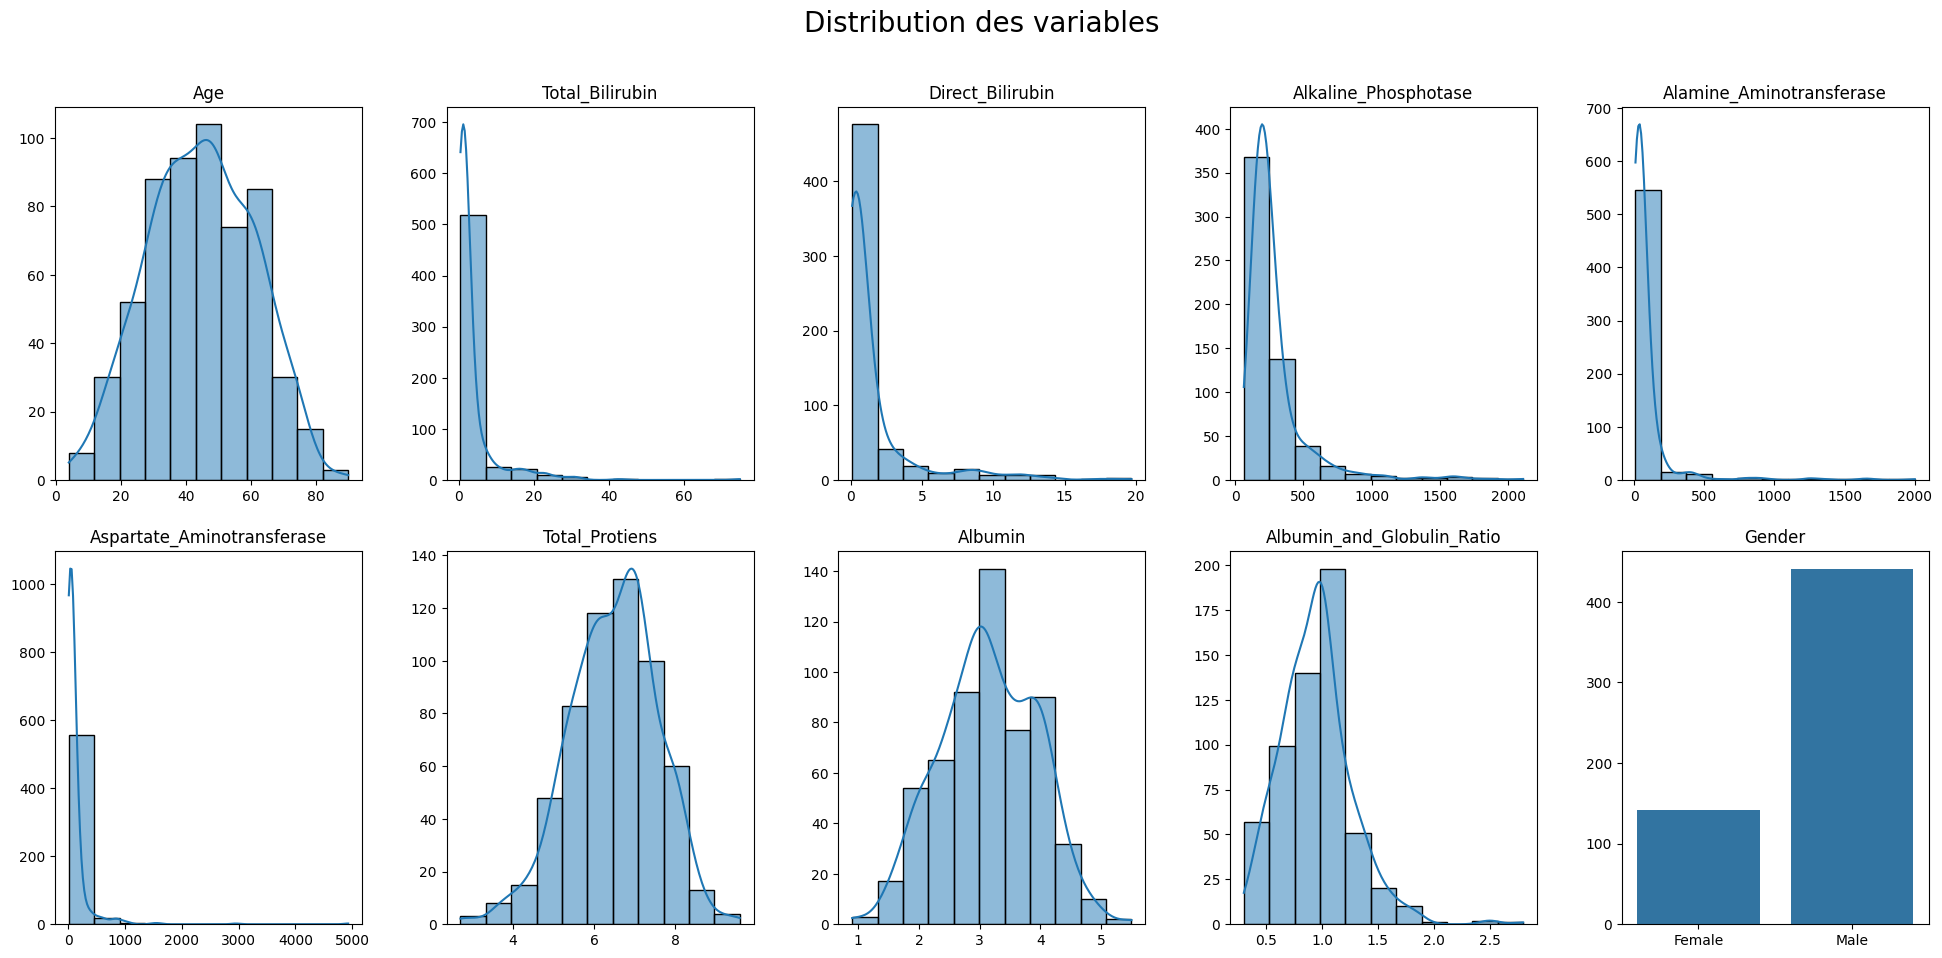

In [120]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 rangées et 5 colonnes pour un total de 10 sous-graphiques
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

# Variables du DataFrame, on exclut la variable "Dataset"
variables = ["Age", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", 
             "Aspartate_Aminotransferase", "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio", "Gender"]

# Boucle sur les colonnes pour créer les histogrammes
for i, col in enumerate(variables):
    ax = axes[i//5, i%5]
    if col == "Gender":
        sns.countplot(x=df[col], ax=ax)
        ax.set_title('Gender')
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        sns.histplot(df[col], bins='sturges', kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

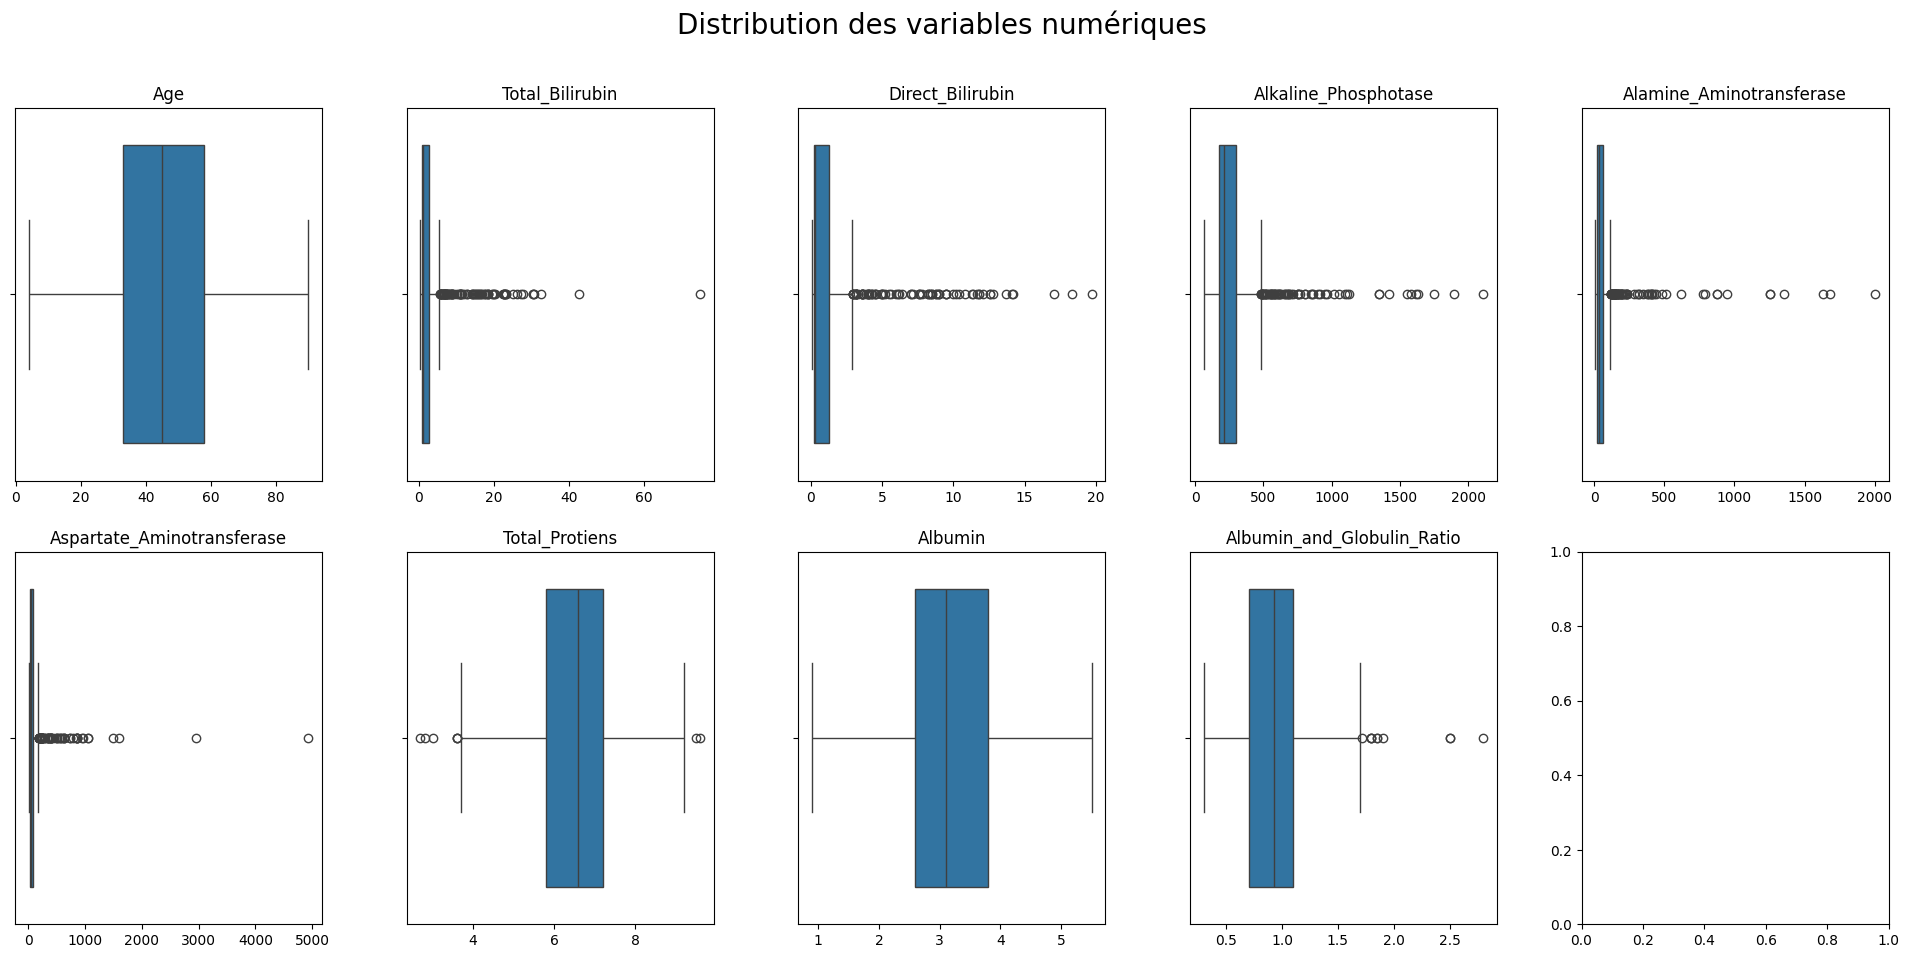

In [121]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Distribution des variables numériques', fontsize=20)
fig.tight_layout(pad=3.0)

numeric_columns = ["Age", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", 
                   "Aspartate_Aminotransferase", "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio"]

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la partie supérieure ce qu'on a, sauf pour la colonne Total_Proteins.

#### Commentaire sur les outliers Q1:

Total_Proteins : les outliers ne sont pas très grands mais peuvent s'expliquer par des cas avancés où la synthèse protéique du foie est compromise.

#### Commentaires sur les outliers Q3:

L'ensemble des outliers des colonnes Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase et Aspartate_Aminotransferase sont des cas très sévère qui peuvent être lié au maladie suivante : Hémochromatose, Maladie de Wilson, NASH, cirrhose, Hépatites, stéatohépatite non-alcoolique.
Ces outliers restent donc cohérents.

### 1.2.2 - Analyse statique descriptive de base

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


## 2 - Nettoyage des données

### 2.2 - Traitement des valeur manquantes et reset d'index

In [123]:
df = df.dropna()
df = df.reset_index(drop=True)
df


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
574,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### 2.1 - Création d'ID pour chaque ligne sur l'index

In [124]:
df = df.reset_index().rename(columns={'index': 'ID'})
df

,ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,574,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,575,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,576,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,577,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
